# Link Untuk Belajar

https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb

CNN


https://medium.freecodecamp.org/learn-to-build-a-convolutional-neural-network-on-the-web-with-this-easy-tutorial-2d617ffeaef3

load data from gdrive

https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

# Mount Drive

In [24]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
import glob
import numpy 
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import cv2                 
from random import shuffle
from tqdm import tqdm
import skimage.data 

import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Preparing Data Training

**File Path**

In [0]:
# dataset REDRAW
train_path = "drive/My Drive/SKRIPSI/dataset/training/"
test_path = "drive/My Drive/SKRIPSI/dataset/test/"
class_path = "drive/My Drive/SKRIPSI/class.txt"

**Open Class**

In [0]:
f = open(class_path,"r")
classes = f.readlines()
f.close()

In [4]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)
print (len(classes))
# f = open(class_path,"r")
# classes = f.readlines()
# f.close()

['TextView', 'ImageView', 'ImageButton', 'EditText']
4


**Create Train Data**

In [0]:
# def label_img(cls):
#     if cls == 'default': 
#       return [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#     elif cls == 'Button': 
#       return [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#     elif cls == 'TextView': 
#       return [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#     elif cls == 'ImageView': 
#       return [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#     elif cls == 'ImageButton': 
#       return [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
#     elif cls == 'EditText': 
#       return [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
#     elif cls == 'CheckBox': 
#       return [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
    
#     elif cls == 'CheckedTextView': 
#       return [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
#     elif cls == 'RadioButton': 
#       return [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
#     elif cls == 'ProgressBar': 
#       return [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
#     elif cls == 'SeekBar': 
#       return [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
#     elif cls == 'NumberPicker': 
#       return [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
    
#     elif cls == 'Switch': 
#       return [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
#     elif cls == 'ToggleButton': 
#       return [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
#     elif cls == 'RatingBar': 
#       return [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
#     elif cls == 'Spinner': 
#       return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
    
#     elif cls == 'None': 
#       return [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    

In [0]:
def label_img(cls):

    if cls == 'TextView': 
      return [1,0,0,0,0]
    elif cls == 'ImageView': 
      return [0,1,0,0,0]
    elif cls == 'ImageButton': 
      return [0,0,1,0,0]
    elif cls == 'EditText': 
      return [0,0,0,1,0]    
    elif cls == 'None': 
      return [0,0,0,0,1]

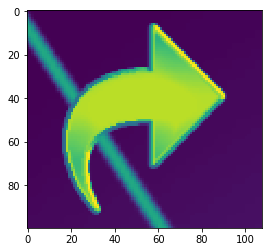

(100, 108)


In [0]:

# img = mpimg.imread(train_path)
# new_array = cv2.resize(img,(size, size))
# plt.imshow(new_array, cmap='gray')
# plt.show()

train_path = "drive/My Drive/SKRIPSI/dataset/training/ImageButton/100.png"
#RESIZE FUNCTION
img = mpimg.imread(train_path)

img = skimage.color.rgb2gray(img)
# new_array= cv2.resize(img, (size,size))
plt.imshow(img)
plt.show()

arrayimg = numpy.asarray(img)
print(arrayimg.shape)

In [13]:
p = 60
l = 60

def create_train_data_new():
  training_data = []
  label = []
  
  for cls in classes:
    for img in tqdm(os.listdir(train_path+cls)):
      label_temp = label_img(cls)
      path = os.path.join(train_path+cls,img)
#       img = skimage.color.rgb2gray(img)
#       img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
      img= cv2.imread(path)
      img = cv2.resize(img, (p,l))
      test = numpy.array(img)
      training_data.append(test)
      label.append(label_temp)  
#       print (label_temp)
  return training_data, label

training_data, training_label = create_train_data_new()

100%|██████████| 1100/1100 [00:04<00:00, 274.57it/s]


In [14]:
# p = numpy.array(p)
# l = numpy.array(l)
# p = p.shape[0]
# l = l.shape[1]

p=60
l=60
def create_test_data_new():
  testing_data = []
  test_label = []
  
  for cls in classes:
    for img in tqdm(os.listdir(test_path+cls)):
      label_temp = numpy.array(label_img(cls))
#       print(cls)
      path = os.path.join(test_path+cls,img)
#       img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
      img= cv2.imread(path)
      img = cv2.resize(img, (p,l))
      test = numpy.array(img)
      testing_data.append(test)
      test_label.append(label_temp)  
#       print (label_temp)
  return testing_data, test_label
testing_data, testing_label = create_test_data_new()




100%|██████████| 110/110 [00:00<00:00, 301.08it/s]


In [16]:
training_data = numpy.array(training_data)
training_label = numpy.array(training_label)
print ("training_data"+str(training_data.shape))
print ("training_label"+str(training_label.shape))

testing_data = numpy.array(testing_data)
testing_label = numpy.array(testing_label)
print ("testing_data"+str(testing_data.shape))
print ("testing_label"+str(testing_label.shape))

# test_label = []
# label_temp = numpy.array(label_img('TextView'))
# label_temp1 = numpy.array(label_img('ImageButton'))
# (test_label.append(label_temp))
# (test_label.append(label_temp1))
# print(test_label)
# print(numpy.array(test_label).shape)


training_data(4400, 60, 60, 3)
training_label(4400, 5)
testing_data(440, 60, 60, 3)
testing_label(440, 5)


## ara nyobak

In [0]:
# import keras
# from keras.callbacks import EarlySTopping
# from keras.layers import Dense, Dropout
# from keras 
# import regularizers

print("x_train: {}".format(training_data.shape))
print("y_train: {}".format(training_label.shape[0]))
print()
print("x_test: {}".format(testing_data.shape))
print("y_test: {}".format(testing_label.shape[0]))

x_train: (4400, 227, 227)
y_train: 4400

x_test: (440, 227, 227)
y_test: 440


image (#190): wich is digit '[0 1 0 0 0]'


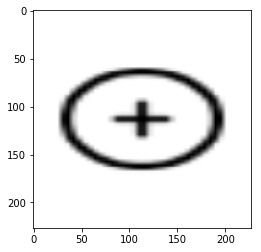

In [0]:
digit = 190
a = testing_data[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print ("image (#{}): wich is digit '{}'".format(digit,testing_label[digit]))

# Training Process


In [0]:
# !pip uninstall tflearn 
# !pip uninstall tensorflow -y
# !pip uninstall protobuf


# !pip install tensorflow-gpu==1.4.0
# !pip show tensorflow

# !pip install tensorflow-gpu==1.3
# !pip install tflearn
# !pip install keras
# !pip install h5py numpy scikit-learn sklearn tensorflow-gpu # !pip install tflearn opencv-python pyttsx3

In [0]:
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping  
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
%matplotlib inline

In [38]:

# x_train, x_test, y_train, y_test = train_test_split(training_data, label, test_size=0.3, random_state=42)
# print (type(training_data))
# print (("training_data= "+str(training_data.shape)))
# print('y_train ='+str(y_train.shape))

# normalisasi inputs from 0-255 to 0-1
x_train = training_data.astype("float32")
x_test = testing_data.astype("float32")
# x_train /= 225
# x_test /= 225 
x_train = x_train / 255
x_test = x_test/ 255

# reshape
x_train = x_train.reshape(x_train.shape[0], l, p, 3)
x_test = x_test.reshape(x_test.shape[0], l, p, 3)
input_shape = (p, l, 3)

print ((x_train.shape))

# AlexNet==================================================
# model = Sequential()
# model.add(Conv2D(96, kernel_size=(11,11), padding='valid', strides=(4,4), activation="relu", input_shape=(227,227,3)))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
# # norm

# model.add(Conv2D(256, kernel_size=(5,5), padding='SAME', activation="relu"))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
# # norm
          
# model.add(Conv2D(384, kernel_size=(3,3), padding='SAME', activation="relu"))
# model.add(Conv2D(384, kernel_size=(3,3), padding='SAME', activation="relu"))
# model.add(Conv2D(256, kernel_size=(3,3), padding='SAME', activation="relu"))
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))


# model.add(Flatten())

# model.add(Dropout(0.5))
# model.add(Dense(4096, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(4096, activation="relu"))

# model.add(Dense(5, activation="softmax"))
# AlexNet done============================================


# http://vision.stanford.edu/teaching/cs231b_spring1415/slides/alexnet_tugce_kyunghee.pdf
# redraw===========================================================
model = Sequential()
model.add(Conv2D(64, kernel_size=(7,7), padding='SAME', strides=(2,2), activation="relu", input_shape=(60,60,3)))

model.add(Conv2D(64, kernel_size=(7,7), padding='SAME', strides=(2,2), activation="relu"))

model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), padding='valid', activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Dropout(0.25))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1024, activation="relu"))
# model.add(BatchNormalization())

model.add(Dense(5, activation="softmax"))

# redraw done===================================================

# LeNET==========================================================
# def createModel():
# model = Sequential()
# model.add(Conv2D(6, kernel_size=(3,3), padding='valid', strides=(1,1), activation="relu", input_shape=(32,32,1)))
# model.add(AveragePooling2D())
# model.add(Conv2D(16, kernel_size=(3,3), padding='valid', strides=(1,1), activation="relu"))
# model.add(AveragePooling2D())

# model.add(Flatten())

# model.add(Dense(120, activation="relu"))
# model.add(Dense(84, activation="relu"))

# model.add(Dense(5, activation="softmax"))
# LeNET==========================================================


# Train model
adam = tf.train.AdamOptimizer()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
print(model.summary())

(4400, 60, 60, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 64)        9472      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 64)        200768    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 96)        55392     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 10, 96)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9600)              0  

In [0]:

# x_train, x_test, y_train, y_test = train_test_split(training_data, label, test_size=0.3, random_state=42)
# print (type(training_data))
# print (("training_data= "+str(training_data.shape)))
# print('y_train ='+str(y_train.shape))

# normalisasi
x_train = training_data.astype("float32")
x_test = testing_data.astype("float32")
x_train /= 225
x_test /= 225 

# reshape
x_train = x_train.reshape(x_train.shape[0], l, p, 1)
x_test = x_test.reshape(x_test.shape[0], l, p, 1)
input_shape = (p, l, 1)

print ((x_train.shape))



# http://vision.stanford.edu/teaching/cs231b_spring1415/slides/alexnet_tugce_kyunghee.pdf
# redraw===========================================================
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), padding='SAME', strides=(1,1), activation="relu", input_shape=(227,227,3)))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))

# model.add(Conv2D(64, kernel_size=(3,3), padding='SAME', strides=(1,1), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(128, kernel_size=(3,3), padding='SAME', strides=(1,1), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())

# model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation="softmax"))
# redraw done===================================================


#  new =====================================================
model = Sequential()
model.add(Conv2D(3, kernel_size=(11,11), padding='SAME', strides=(1,1), activation="relu", input_shape=(227,227,1)))
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))

model.add(Conv2D(48, kernel_size=(5,5), padding='SAME', strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(256, kernel_size=(3,3), padding='SAME', strides=(1,1), activation="relu"))
model.add(Conv2D(192, kernel_size=(3,3), padding='SAME', strides=(1,1), activation="relu"))
model.add(Conv2D(192, kernel_size=(3,3), padding='SAME', strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())

# model.add(Dropout(0.5))
model.add(Dense(2048, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.5))

# model.add(Dense(5, activation="sigmoid"))
model.add(Dense(5, activation="softmax"))
# end ======================================================
# Train model
adam = tf.train.AdamOptimizer()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
print(model.summary())

In [19]:
testing_data = np.array(testing_data)
testing_label = np.array(testing_label)
print ("testing_data"+str(testing_data.shape))
print ("testing_label"+str(testing_label.shape))

testing_data(440, 60, 60, 3)
testing_label(440, 5)


In [41]:
my_callbacks = [EarlyStopping(monitor="acc", patience=5, mode=max)]


hist = model.fit(x_train, training_label, batch_size=120, epochs=100, verbose=1, validation_split=0.3, callbacks=my_callbacks)
score = model.evaluate(x_test, testing_label)
print("Testing Loss:", score[0])
print("Testing Accuracy:", score[1])





/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:511: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


Train on 3080 samples, validate on 1320 samples
Epoch 1/100
3080/3080 [==============================] - 2s 745us/step - loss: 4.3973 - acc: 0.3269 - val_loss: 8.0234 - val_acc: 0.1636
Epoch 2/100
3080/3080 [==============================] - 1s 236us/step - loss: 1.3553 - acc: 0.3711 - val_loss: 12.2561 - val_acc: 0.0530
Epoch 3/100
3080/3080 [==============================] - 1s 236us/step - loss: 1.0334 - acc: 0.4987 - val_loss: 12.3324 - val_acc: 0.0485
Epoch 4/100
3080/3080 [==============================] - 1s 234us/step - loss: 0.9084 - acc: 0.5812 - val_loss: 12.1384 - val_acc: 0.0477
Epoch 5/100
3080/3080 [==============================] - 1s 234us/step - loss: 0.8362 - acc: 0.6286 - val_loss: 12.2069 - val_acc: 0.0758
Epoch 6/100
3080/3080 [==============================] - 1s 234us/step - loss: 0.7795 - acc: 0.6442 - val_loss: 12.0278 - val_acc: 0.0530
Epoch 7/100
3080/3080 [==============================] - 1s 241us/step - loss: 0.7314 - acc: 0.6779 - val_loss: 12.0919 - val

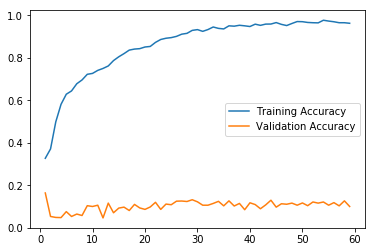

In [42]:
# print((hist.history["acc"]))
epoch_list = list(range(1, len(hist.history["acc"]) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(("Training Accuracy", "Validation Accuracy"))
plt.show()

In [39]:
score = model.evaluate(x_train, training_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6521728173169223
Test accuracy: 0.0009090909090909091


# Training with data augmentation

# Inference

[array([1, 0, 0, 0, 0]), array([1, 0, 0, 0, 0]), array([1, 0, 0, 0, 0]), array([1, 0, 0, 0, 0]), array([1, 0, 0, 0, 0])]
(60, 60, 3)


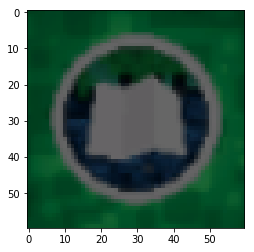

In [53]:
# import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [testing_label[x] for x in ind]
print((latex))
print(img.shape)

# coba

In [0]:
EPOCHS = 10
BATCH_SIZE = 128

In [0]:
X_train, y_train = train['features'], to_categorical(train['labels'])
X_validation, y_validation = validation['features'], to_categorical(validation['labels'])

train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

NameError: ignored

In [0]:
print('# of training images:', x_train['features'].shape[0])
# print('# of validation images:', testing['features'].shape[0])

steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

IndexError: ignored

In [59]:
from scipy import stats
train_path = "drive/My Drive/SKRIPSI/dataset/training/ImageButton/"
dataset=stats.zscore(train_path)
scaler = MinMaxScaler(feature_range=(-1,1))
dataset = scaler.fit_transform(dataset)
print(dataset)

IndexError: ignored